In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data' # Corrected path
categories = os.listdir(data_dir)

images = []
labels = []

for category in categories:
    print(category)
    folder_path = os.path.join(data_dir, category)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img)
            labels.append(category)

images = np.array(images)

Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Target_Spot
Tomato___Late_blight
Tomato___healthy
Tomato___Bacterial_spot
Tomato___Early_blight


In [ ]:
x = np.array(images)
y = np.array(labels)

print("Labels:", np.unique(y))
print("Data shape:", x.shape)


Labels: ['Tomato___Late_blight' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tomato_mosaic_virus'
 'Tomato___healthy']
Data shape: (7650, 64, 64, 3)


class Distribution
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1971
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1790
Tomato___healthy                           211
Name: count, dtype: int64


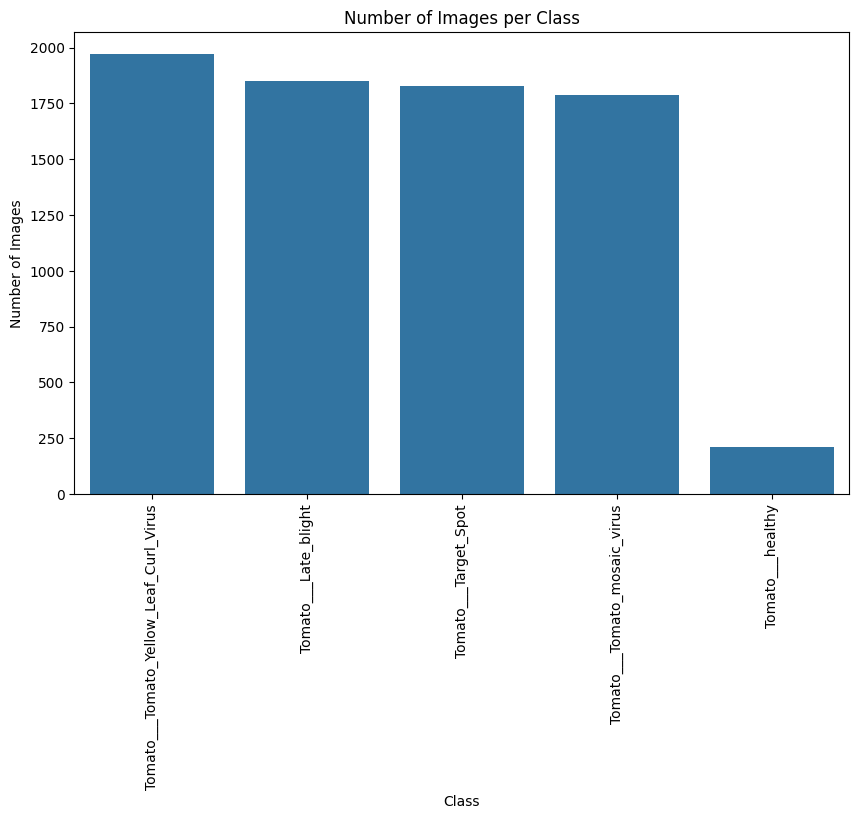

In [ ]:
class_counts = pd.Series(y).value_counts()
print("class Distribution")
print(class_counts)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [ ]:
valid_images =[]
valid_label =[]

for img,label in zip(x,y):
    if img .shape ==(64,64,3):
        valid_images.append(img)
        valid_label.append(label)

x = np.array(valid_images)
y = np.array(valid_label)

print("Cleaned Data Shape",x.shape)

Cleaned Data Shape (7650, 64, 64, 3)


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_names = le.classes_
class_names

array(['Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

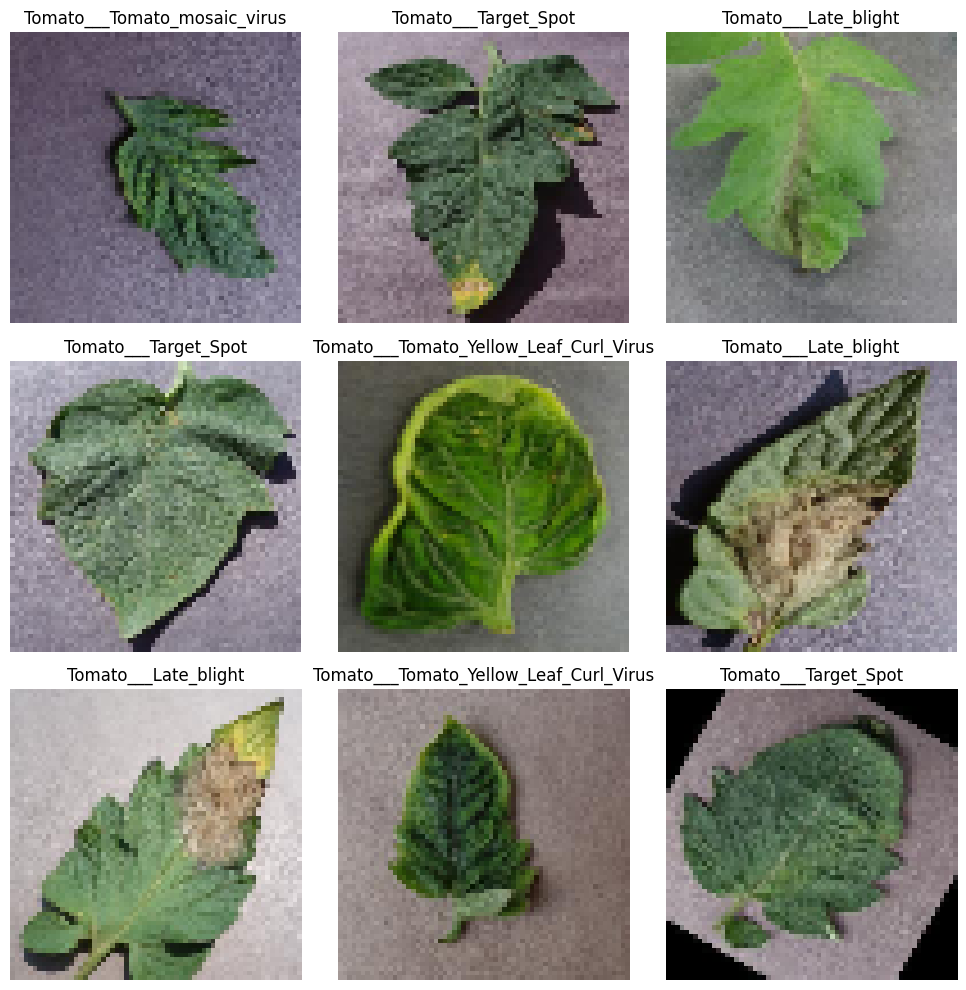

In [ ]:
import random
plt.figure(figsize=(10,10))
for i in range(9):
    idx = random.randint(0,len(x)-1) # Corrected typo and added -1 to avoid index out of bounds
    plt.subplot(3,3,i+1)
    plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
    plt.title(class_names[y_encoded[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def extract_color_histogram(image, bins=(8, 8, 8)):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

hist_features = [extract_color_histogram(img) for img in x]
x_features = np.array(hist_features)

In [ ]:
x_features.shape

(7650, 512)

In [ ]:
model = SVC(kernel='rbf',C=10,gamma='scale')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_encoded, test_size=0.2, random_state=42)

model.fit(x_train, y_train)


y_pred=model.predict(x_test)

Accuracy: 0.9875816993464053
F1 Score: 0.987575868824954


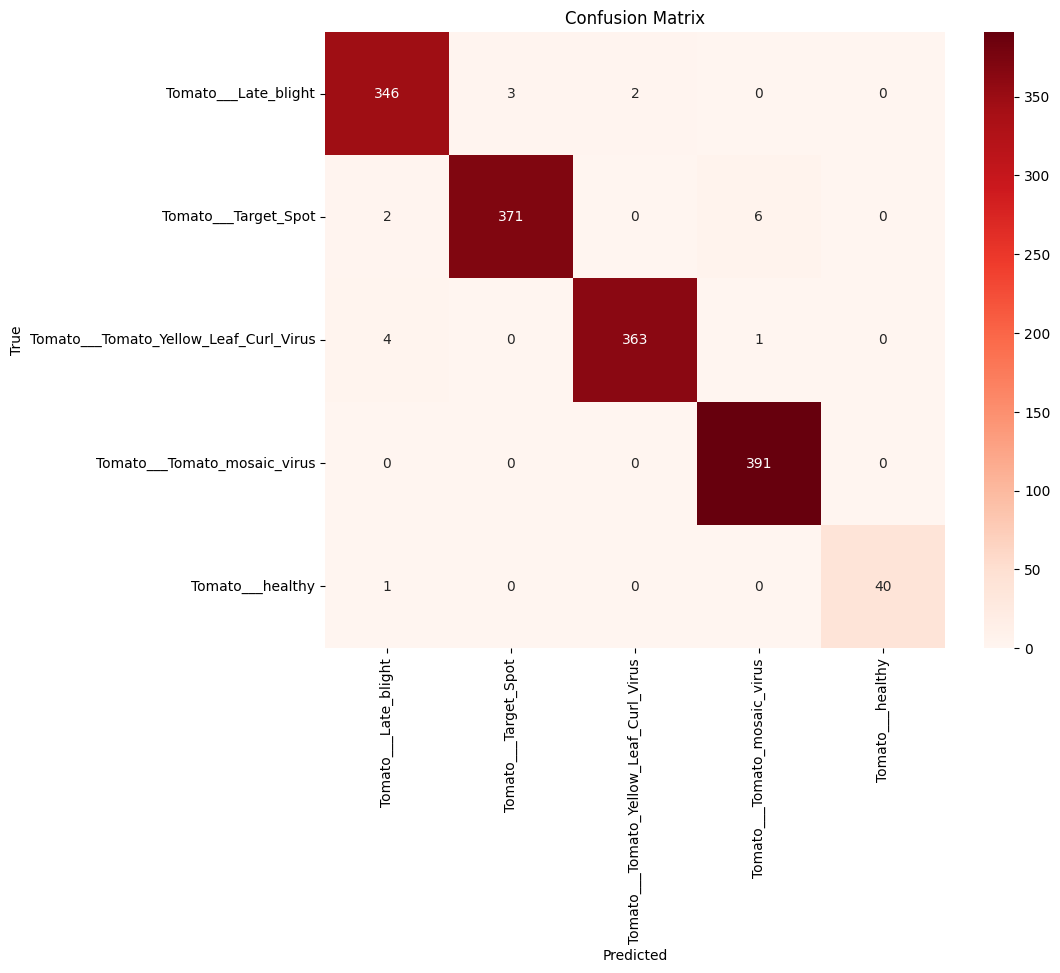

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
                                        precision    recall  f1-score   support

                  Tomato___Late_blight       0.98      0.99      0.98       351
                  Tomato___Target_Spot       0.99      0.98      0.99       379
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       368
          Tomato___Tomato_mosaic_virus       0.98      1.00      0.99       391
                      Tomato___healthy       1.00      0.98      0.99        41

                              accuracy                           0.99      1530
                             macro avg       0.99      0.99      0.99      1530
                          weighted avg       0.99      0.99      0.99      1530

